#### Module import

In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split # Data Split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소'

##### Path

In [3]:
os.chdir('./3차 요청자료/2023-02-07근내지방_5')
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\3차 요청자료\\2023-02-07근내지방_5'

##### Check
> 또 마지막 변수명 외증조로 중복돼있음, 일단 파일 한번에 불러서 합친 다음 변수명 다시 바꾸기

In [5]:
# 확인
a1 = pd.read_excel('근내지방5_0.xlsx')
a1.head()

,이표번호,KPN,성별,출생일,농가코드,농가등급,도축개월,도축일,등급,도체중,...,외증조할미형매 등심단면적 평균,외증조할미형매 등지방 평균,외증조할미형매 근내지방 평균,외증조할미형매 마릿수,외고고조할미 이표번호,외증조할미형매 도체중 평균.1,외증조할미형매 등심단면적 평균.1,외증조할미형매 등지방 평균.1,외증조할미형매 근내지방 평균.1,외증조할미형매 마릿수.1
0,2153702904,KPN1159,암,2020-07-10,471813,1+B,31,2023-01-26,1+B,423,...,84.17,14.33,4.0,6,191430013,367.0,81.0,8.00,4.00,1
1,2151092783,KPN1124,거세,2020-05-04,465561,1+B,31,2022-11-28,1A,459,...,93.33,13.00,5.0,3,195655634,428.0,91.0,18.67,6.33,3
2,2152856190,KPN1243,거세,2020-06-03,463150,1+C,32,2023-01-13,1+B,502,...,59.00,11.00,5.5,2,111579762,357.0,84.5,18.00,4.00,2
3,2132846585,KPN1078,암,2018-07-29,349362,1+C,54,2023-01-02,1+B,331,...,83.00,7.00,3.0,1,175535796,347.0,87.0,15.00,3.00,1
4,2143085535,KPN1060,거세,2019-08-27,227596,1+C,35,2022-07-13,1++B,572,...,73.50,17.00,1.5,2,195224694,332.0,79.0,20.00,5.00,3


In [6]:
# 파일이 존재하는 경로 불러오기 및 리스트
path = os.getcwd()
file_lst = os.listdir(path)# 파일 이름 담기
file_lst

['근내지방5_0.xlsx',
 '근내지방5_1.xlsx',
 '근내지방5_2.xlsx',
 '근내지방5_3.xlsx',
 '근내지방5_4.xlsx',
 '근내지방5_5.xlsx',
 '근내지방5_6.xlsx',
 '근내지방5_7.xlsx',
 '근내지방5_8.xlsx']

##### ↓ 반복문으로 파일 불러오면서, 하나의 DataFrame으로 합침 

In [13]:
df_5 = pd.DataFrame()
for i in file_lst:
    data_5 = pd.read_excel(path +'/'+i)
    df_5 = pd.concat([df_5, data_5])
    
df_5 = df_5.reset_index(drop = True)

In [14]:
# 확인
print(df_5.shape)
df_5.head()

(4388, 47)


,이표번호,KPN,성별,출생일,농가코드,농가등급,도축개월,도축일,등급,도체중,...,외증조할미형매 등심단면적 평균,외증조할미형매 등지방 평균,외증조할미형매 근내지방 평균,외증조할미형매 마릿수,외고고조할미 이표번호,외증조할미형매 도체중 평균.1,외증조할미형매 등심단면적 평균.1,외증조할미형매 등지방 평균.1,외증조할미형매 근내지방 평균.1,외증조할미형매 마릿수.1
0,2153702904,KPN1159,암,2020-07-10,471813,1+B,31,2023-01-26,1+B,423,...,84.17,14.33,4.0,6,191430013,367.0,81.0,8.00,4.00,1
1,2151092783,KPN1124,거세,2020-05-04,465561,1+B,31,2022-11-28,1A,459,...,93.33,13.00,5.0,3,195655634,428.0,91.0,18.67,6.33,3
2,2152856190,KPN1243,거세,2020-06-03,463150,1+C,32,2023-01-13,1+B,502,...,59.00,11.00,5.5,2,111579762,357.0,84.5,18.00,4.00,2
3,2132846585,KPN1078,암,2018-07-29,349362,1+C,54,2023-01-02,1+B,331,...,83.00,7.00,3.0,1,175535796,347.0,87.0,15.00,3.00,1
4,2143085535,KPN1060,거세,2019-08-27,227596,1+C,35,2022-07-13,1++B,572,...,73.50,17.00,1.5,2,195224694,332.0,79.0,20.00,5.00,3


##### 변수명 재설정

In [16]:
df_5.columns

Index(['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호',
       '형매 도체중 평균', '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수',
       '외할미 이표번호', '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균',
       '어미형매 근내지방 평균', '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균',
       '외할미형매 등심단면적 평균', '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수',
       '외고조할미 이표번호', '외증조할미형매 도체중 평균', '외증조할미형매 등심단면적 평균', '외증조할미형매 등지방 평균',
       '외증조할미형매 근내지방 평균', '외증조할미형매 마릿수', '외고고조할미 이표번호', '외증조할미형매 도체중 평균.1',
       '외증조할미형매 등심단면적 평균.1', '외증조할미형매 등지방 평균.1', '외증조할미형매 근내지방 평균.1',
       '외증조할미형매 마릿수.1'],
      dtype='object')

In [17]:
# 원래 변수명
df_5_c = df_5.copy()
df_5.columns = ['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호',
       '형매 도체중 평균', '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수',
       '외할미 이표번호', '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균',
       '어미형매 근내지방 평균', '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균',
       '외할미형매 등심단면적 평균', '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수',
       '외고조할미 이표번호', '외증조할미형매 도체중 평균', '외증조할미형매 등심단면적 평균', '외증조할미형매 등지방 평균',
       '외증조할미형매 근내지방 평균', '외증조할미형매 마릿수', '외고고조할미 이표번호', '외고조할미형매_도체중_평균', '외고조할미형매_등심단면적_평균', '외고조할미형매_등지방_평균', '외고조할미형매_근내지방_평균',
    '외고조할미형매_마릿수'
]

In [18]:
df_5.columns

Index(['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호',
       '형매 도체중 평균', '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수',
       '외할미 이표번호', '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균',
       '어미형매 근내지방 평균', '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균',
       '외할미형매 등심단면적 평균', '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수',
       '외고조할미 이표번호', '외증조할미형매 도체중 평균', '외증조할미형매 등심단면적 평균', '외증조할미형매 등지방 평균',
       '외증조할미형매 근내지방 평균', '외증조할미형매 마릿수', '외고고조할미 이표번호', '외고조할미형매_도체중_평균',
       '외고조할미형매_등심단면적_평균', '외고조할미형매_등지방_평균', '외고조할미형매_근내지방_평균', '외고조할미형매_마릿수'],
      dtype='object')

In [24]:
# 원 데이터와 변수명 변경 후 데이터 차이 확인
# numpy의 setdiff1d(a, b)를 이용해서, a와 b를 비교하여 b에 없는 것 확인
print(f'변경 후 변수명 : {np.setdiff1d(df_5.columns, df_5_c.columns)}')
print(f'변경 전 변수명 : {np.setdiff1d(df_5_c.columns, df_5.columns)}')

변경 후 변수명 : ['외고조할미형매_근내지방_평균' '외고조할미형매_도체중_평균' '외고조할미형매_등심단면적_평균' '외고조할미형매_등지방_평균'
 '외고조할미형매_마릿수']
변경 전 변수명 : ['외증조할미형매 근내지방 평균.1' '외증조할미형매 도체중 평균.1' '외증조할미형매 등심단면적 평균.1'
 '외증조할미형매 등지방 평균.1' '외증조할미형매 마릿수.1']


In [25]:
df_5.성별.value_counts()

거세    2871
암     1517
Name: 성별, dtype: int64

In [27]:
a1.성별.value_counts()

거세    264
암     206
Name: 성별, dtype: int64

##### 성별 및 근내지방도 변수변환
> <p> <span style = 'color : orange' > 성별 : {F:암, N_M:거세} <span> </p>
> <p> <span style = 'color : orange' > 근내지방도 : {1 : (7~9), 0: (1~6)} <span> </p>

In [34]:
# 성별 암, 거세 => F, N_M 변환
df_5.성별 = df_5.성별.apply(lambda x: 'F' if x == '암' else 'N_M' if x =='거세' else x )
print('변경 전 성별 unique 및 counts')
print(df_5_c.성별.value_counts())
print('\n')
print('변경 후 성별 unique 및 counts')
print(df_5.성별.value_counts())

변경 전 성별 unique 및 counts
거세    2871
암     1517
Name: 성별, dtype: int64


변경 후 성별 unique 및 counts
N_M    2871
F      1517
Name: 성별, dtype: int64


In [35]:
# 근내지방도 0, 1 변경
df_5['근내지방도'] = df_5['근내지방도'].apply(lambda x: 1 if x >= 7 else 0 if x < 7 else x)
print('변경 전 근내지방도 unique 및 counts')
print(df_5_c.근내지방도.value_counts())
print('\n')
print('변경 후 근내지방도 unique 및 counts')
print(df_5.근내지방도.value_counts())

변경 전 근내지방도 unique 및 counts
6.0    1211
4.0     641
7.0     483
5.0     480
9.0     445
8.0     443
3.0     334
2.0     268
1.0      76
Name: 근내지방도, dtype: int64


변경 후 근내지방도 unique 및 counts
0.0    3010
1.0    1371
Name: 근내지방도, dtype: int64


In [40]:
df_5.to_csv('../소_5대 정리/5_total_utf.csv', index= False)

#### Data import

In [3]:
# path
os.chdir('./3차 요청자료/소_5대 정리')
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\3차 요청자료\\소_5대 정리'

In [5]:
full_df = pd.read_csv('5_total_cp.csv', encoding='cp949')

#### 농가 분류를 위한 작업
> 1. 농가 id 고유값 확인
> 2. 농가 id에 따른 등급이 있는데, 각 id별 farm_class가 동일한지 확인

In [5]:
print(full_df.shape)
print(f'농가_id, unique 개수:{len(full_df.farm_id.unique())}')
print('\n')
print(full_df.farm_id.value_counts())

(4388, 47)
농가_id, unique 개수:2957


73569     22
228166    15
407775    14
75021     13
124549    12
          ..
375557     1
87562      1
450045     1
86732      1
379072     1
Name: farm_id, Length: 2957, dtype: int64


In [6]:
print('73569농가의 등급')
print(full_df[full_df['farm_id']==73569]['farm_class'].head())
print(full_df[full_df['farm_id']==73569]['farm_class'].tail())
print('\n')
print('228166농가의 등급')
print(full_df[full_df['farm_id']==228166]['farm_class'].head())
print(full_df[full_df['farm_id']==228166]['farm_class'].tail())

73569농가의 등급
657     1+C
792     1+C
3871    1+C
3872    1+C
3873    1+C
Name: farm_class, dtype: object
4082    1+C
4083    1+C
4084    1+C
4085    1+C
4086    1+C
Name: farm_class, dtype: object


228166농가의 등급
104     1+B
1454    1+B
1822    1+B
1828    1+B
1847    1+B
Name: farm_class, dtype: object
2161    1+B
3672    1+B
3728    1+B
3788    1+B
4307    1+B
Name: farm_class, dtype: object


In [7]:
# 농가 id별 class 최빈값
a1 = full_df.groupby('farm_id')['farm_class'].agg(**{
    'most_common_value':lambda x:x.mode()
}).reset_index()

#### 농가 id별 target 평균

In [8]:
gr_target = full_df.groupby(['farm_id'])['target'].agg(**{'mean_target':'mean'}).reset_index()

# 소숫점 2자리까지 반올림
gr_target.mean_target = gr_target.mean_target.round(2)

In [9]:
# 내림차순 정렬 및 원래 농가 등급을 id별로 붙여 넣어 비교해보기

# 1. target 평균 기준으로 내림차순 정렬
gr_t = gr_target.copy()
gr_t.sort_values('mean_target', ascending=False, inplace=True)
print(gr_t.head())

# 2. target 평균 값과 비교하여 농가 등급이 진짜 우수한지, 원 데이터의 농가 등급 변수를 추가하기
farm = full_df[['farm_id', 'farm_class']].reset_index()
df_mer = pd.merge(gr_t, farm, how='left', left_on= 'farm_id', right_on='farm_id')

      farm_id  mean_target
0        1605          1.0
2664   452678          1.0
2372   436357          1.0
2370   436312          1.0
932    227473          1.0


#### 농가 등급 A, B, C으로 변수 추가

In [6]:
full_df['farm_level'] = full_df['farm_class'].apply(lambda x: 'A' if ((x == '1++A')|(x == '1++B')|(x == '1++C'))  else 'B' if ((x == '1+A')|(x == '1+B')|(x == '1+C')) else 'C')

##### 변경 잘 됐는지 확인

In [7]:
a_cl = full_df[full_df['farm_level']=='A']
b_cl = full_df[full_df['farm_level']=='B']
c_cl = full_df[full_df['farm_level']=='C']
a_cl = a_cl[['farm_id','farm_class','farm_level']]
b_cl = b_cl[['farm_id','farm_class','farm_level']]
c_cl = c_cl[['farm_id','farm_class','farm_level']]

In [8]:
print(a_cl.farm_class.unique())
print(b_cl.farm_class.unique())
print(c_cl.farm_class.unique())

['1++C' '1++B' '1++A']
['1+B' '1+C' '1+A']
['1C' '1A' '1B' '2C' '3B' '3A' '2A' '2B' '등외']


In [10]:
full_df.farm_level.value_counts()

B    2448
C    1878
A      62
Name: farm_level, dtype: int64

In [9]:
full_df.to_csv('5대_등급추가_full_cp.csv', encoding='cp949', index=False)

In [6]:
df= pd.read_csv('C:/Users/Owner/Desktop/윤태준/소/3차 요청자료/소_5대 정리/5_total_cp.csv', encoding='cp949')

C:\Users\Owner\AppData\Local\Temp\ipykernel_66920\2693751311.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sl_m'], label= '도축개월')


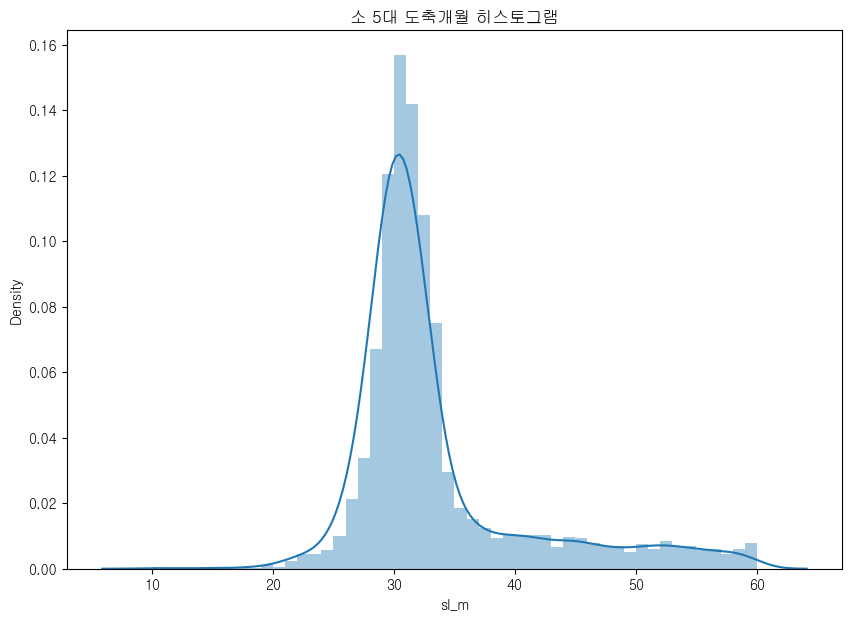

In [7]:
plt.figure(figsize=(10,7))
sns.distplot(df['sl_m'], label= '도축개월')

plt.title('소 5대 도축개월 히스토그램')
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_66920\4244076924.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sl_m'], label= '도축개월')


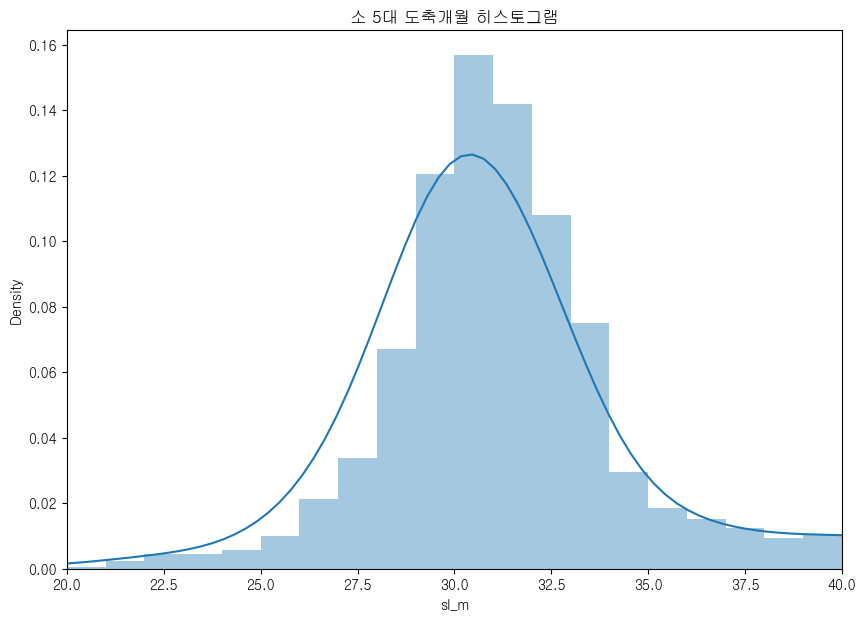

In [8]:
plt.figure(figsize=(10,7))
sns.distplot(df['sl_m'], label= '도축개월')

plt.title('소 5대 도축개월 히스토그램')
plt.xlim(20,40)
plt.show()

In [5]:
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\3차 요청자료\\2023-02-07근내지방_5'

In [4]:
full_df = pd.read_csv('5대_등급추가_full_cp.csv', encoding='cp949')
full_df.head()

,id,kpn,gender,bir,farm_id,farm_class,sl_m,sl_d,class,s_w,...,c_s_f_m,c_s_t_m,c_s_c,d_id,d_s_m_w,d_s_m_i,d_s_f_m,d_s_t_m,d_s_c,farm_level
0,2153702904,KPN1159,F,2020-07-10,471813,1+B,31,2023-01-26,1+B,423,...,14.33,4.0,6,191430013,367.0,81.0,8.00,4.00,1,B
1,2151092783,KPN1124,N_M,2020-05-04,465561,1+B,31,2022-11-28,1A,459,...,13.00,5.0,3,195655634,428.0,91.0,18.67,6.33,3,B
2,2152856190,KPN1243,N_M,2020-06-03,463150,1+C,32,2023-01-13,1+B,502,...,11.00,5.5,2,111579762,357.0,84.5,18.00,4.00,2,B
3,2132846585,KPN1078,F,2018-07-29,349362,1+C,54,2023-01-02,1+B,331,...,7.00,3.0,1,175535796,347.0,87.0,15.00,3.00,1,B
4,2143085535,KPN1060,N_M,2019-08-27,227596,1+C,35,2022-07-13,1++B,572,...,17.00,1.5,2,195224694,332.0,79.0,20.00,5.00,3,B


#### Univariate Logistic Regression

In [5]:
full_df.columns

Index(['id', 'kpn', 'gender', 'bir', 'farm_id', 'farm_class', 'sl_m', 'sl_d',
       'class', 's_w', 'i_a', 'f_t', 'target', 'b_c', 'f_c', 'm_l', 'organ',
       'mom_id', 's_m_w', 's_m_i', 's_f_m', 's_t_m', 's_c', 'a_id', 'a_s_m_w',
       'a_s_m_i', 'a_s_f_m', 'a_s_t_m', 'a_s_c', 'b_id', 'b_s_m_w', 'b_s_m_i',
       'b_s_f_m', 'b_s_t_m', 'b_s_c', 'c_id', 'c_s_m_w', 'c_s_m_i', 'c_s_f_m',
       'c_s_t_m', 'c_s_c', 'd_id', 'd_s_m_w', 'd_s_m_i', 'd_s_f_m', 'd_s_t_m',
       'd_s_c', 'farm_level'],
      dtype='object')

In [6]:
# 사용할 변수만 고르기
logit_df = full_df.copy()
uni_logit_df = full_df[['gender', 's_w', 'sl_m',  's_m_w', 's_m_i', 's_f_m', 's_t_m', 's_c', 'a_s_m_w',
       'a_s_m_i', 'a_s_f_m', 'a_s_t_m', 'a_s_c', 'b_s_m_w', 'b_s_m_i',
       'b_s_f_m', 'b_s_t_m', 'b_s_c', 'c_s_m_w', 'c_s_m_i', 'c_s_f_m',
       'c_s_t_m', 'c_s_c', 'd_s_m_w', 'd_s_m_i', 'd_s_f_m', 'd_s_t_m',
       'd_s_c','farm_level','target']]
print(uni_logit_df.shape)
print(uni_logit_df.columns)

(4388, 30)
Index(['gender', 's_w', 'sl_m', 's_m_w', 's_m_i', 's_f_m', 's_t_m', 's_c',
       'a_s_m_w', 'a_s_m_i', 'a_s_f_m', 'a_s_t_m', 'a_s_c', 'b_s_m_w',
       'b_s_m_i', 'b_s_f_m', 'b_s_t_m', 'b_s_c', 'c_s_m_w', 'c_s_m_i',
       'c_s_f_m', 'c_s_t_m', 'c_s_c', 'd_s_m_w', 'd_s_m_i', 'd_s_f_m',
       'd_s_t_m', 'd_s_c', 'farm_level', 'target'],
      dtype='object')


##### 농장 등급 추가하고, train_test_split

In [9]:
X_5 = uni_logit_df.drop(['target'],axis=1)
Y_5 = uni_logit_df.target
X_train_5, X_test_5, Y_train_5, Y_test_5 = train_test_split(X_5, Y_5, test_size=0.3, random_state = 7777)

In [10]:
train_5 = pd.concat([X_train_5,Y_train_5], axis=1)
test_5 = pd.concat([X_test_5,Y_test_5], axis=1)

In [11]:
train_5.to_csv('등급추가_train_cp.csv', encoding='cp949', index=False)
test_5.to_csv('등급추가_test_cp.csv', encoding='cp949', index=False)

#### 반복문을 이용하여 단변량 로지스틱 돌리기

##### full data set univariate logistic regression

In [12]:
for i in range(0,29):
    print(f'순서:{i+1}번째 변수')
    model = sm.Logit.from_formula('target ~ uni_logit_df.iloc[:,i]', uni_logit_df).fit()
    print(f'독립변수 이름: {uni_logit_df.columns[i]}')
    print(model.summary())
    print('============='*3)
    print(f'모델 AIC:{model.aic}')
    print('\n')
    print(f'오즈비{np.exp(model.params)}')
    print('\n')

순서:1번째 변수
Optimization terminated successfully.
         Current function value: 0.603498
         Iterations 5
독립변수 이름: gender
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 4381
Model:                          Logit   Df Residuals:                     4379
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Feb 2023   Pseudo R-squ.:                 0.02886
Time:                        17:08:05   Log-Likelihood:                -2643.9
converged:                       True   LL-Null:                       -2722.5
Covariance Type:            nonrobust   LLR p-value:                 4.715e-36
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.4197 

##### split data set(train) univariate logistic regression

In [13]:
for i in range(0,29):
    print(f'순서:{i+1}번째 변수')
    model = sm.Logit.from_formula('target ~train_5.iloc[:,i]',train_5).fit()
    print(f'독립변수 이름: {train_5.columns[i]}')
    print(model.summary())
    print('============='*3)
    print(f'모델 AIC:{model.aic}')
    print('\n')
    print(f'오즈비{np.exp(model.params)}')
    print('\n')

순서:1번째 변수
Optimization terminated successfully.
         Current function value: 0.603408
         Iterations 5
독립변수 이름: gender
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3066
Model:                          Logit   Df Residuals:                     3064
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Feb 2023   Pseudo R-squ.:                 0.02801
Time:                        17:08:32   Log-Likelihood:                -1850.0
converged:                       True   LL-Null:                       -1903.4
Covariance Type:            nonrobust   LLR p-value:                 5.375e-25
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.4075      0.077    -